# TME4: Frequency filtering, color

In [2]:
import numpy as np
from numpy.fft import fft2,ifft2,fftshift
import matplotlib.pyplot as plt
from PIL import Image
from math import sqrt

def imshow(I,title=None,size=500):
    """ display an image with a specific size """
    plt.figure(figsize=(size//80,size//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()
    
def computeFT(I):
    return np.fft.fft2(I)
    """ Array -> Array[complex] """

def toVisualizeFT(If):
    return np.fft.fftshift(np.abs(If))
    """ Array[complex] -> Array[float] """

def toVisualizeLogFT(If):
    return np.log(1+np.fft.fftshift(np.abs(If)))
    """ Array[complex] -> Array[float] """


## Exercice 1 - Frequency filtering

1. Compute than display the centered module of Fourier transform of image `img/mandrill.png` (use functions seen in previous lessons). 

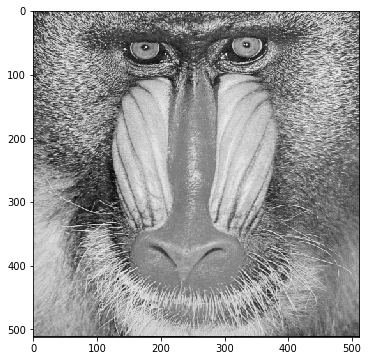

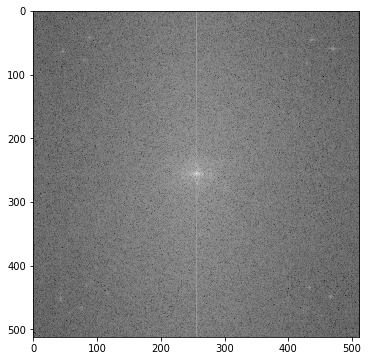

In [3]:
mandrill_img = np.array(Image.open('img/mandrill.png'))
mandrill_ft = toVisualizeLogFT(computeFT(mandrill_img))
imshow(mandrill_img)
imshow(mandrill_ft)

2. Write a function `idealLowPassFilter(n,m,fc)` returning an ideal low pass filter with frequency cutoff $f_c$ and size $n\times m$. Recall: this function set to 1 pixels at distance $f_c$ from the center (null frequency).

In [4]:
def idealLowPassFilter(n,m,fc):
    filtre=np.zeros((n, m))
    centern=int(n/2)
    centerm=int(m/2)
    for i in range (n):
        for j in range (m):
            distancen=abs(i-centern)
            distancem=abs(j-centerm)
            if (sqrt(distancen**2+distancem**2)<=(fc)):
                filtre[i][j]=1
    return filtre

idealLowPassFilter(15,15,6)
            

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

3. Write a function `lowPass(I,fc)` performing a low pass filtering of an image $I$. The function should
 - compute the centered Fourier transform of $I$
 - multiply point-by-point the spectrum with the ideal low filter produced by `idealLowPassFilter()`
 - uncenter the filtered spectrum and apply the inverse Fourier transform (function `ifft2()` from module `numpy.fft`
 - return the real part of filtered image

In [5]:
def lowPass(I,fc):
    I_ft = fftshift(computeFT(I))
    n=I.shape[0]
    m=I.shape[1]
    ilf=idealLowPassFilter(n,m,fc)
    filtred=I_ft*ilf

    filtred=fftshift(filtred)

    filtred=ifft2(filtred).real

    return filtred



4. Experiment this function on `img/mandrill.png` and `img/lena.jpg` with various values of cut off $f_c$.
 - give two effects that appears when $f_c$ decreases,
 - propose two applications of this filtering.


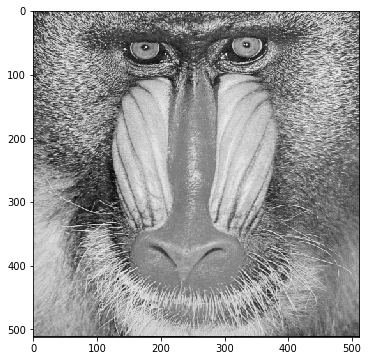

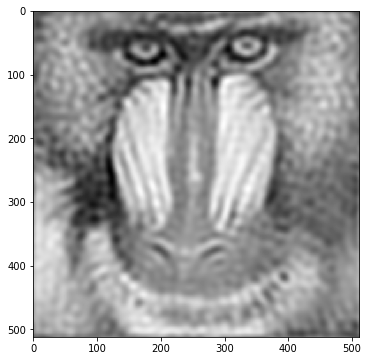

In [7]:
imshow(mandrill_img)
imshow(lowPass(mandrill_img,30))    

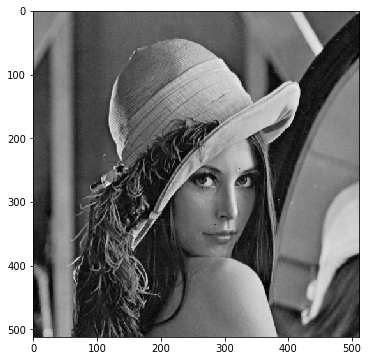

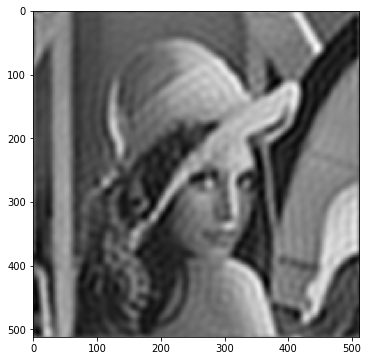

In [6]:
lena_img = np.array(Image.open('img/lena.jpg'))
imshow(lena_img)
imshow(lowPass(lena_img,30))    

Applications:
- smoothing (or blurring)
- can sometimes be used to bring out faint details that were smothered by noise.
- selectively smooth the image background, while leaving the bright areas untouched

## Exercice 2 -  Linear filtering (convolution)

1. Given a kernel convolution of size $d\times d$, $d$ being odd. How many lines and columns should be added to each side of the image to apply this filter? The image is supposed surrounded by zero values.

 réponse: d/2 lignes d/2 colonnes en plus de chaques côté

2. Write a function `imagePad(I,h)` getting an image and a kernel, returning a new image padded with zeros according to question 1.

In [8]:
def imagePad(I,h):
    padding_size=int(h.shape[0]/2)
    print(padding_size)
    h=I.shape[0]+padding_size*2
    w=I.shape[1]+padding_size*2  
    
    result = np.zeros((h,w))
    result[padding_size:h-padding_size,padding_size:w-padding_size ]= I
    return  result

In [9]:
a=np.zeros((6,6))
a=a+1
h=np.zeros((5,5))
h=h+1
imagePad(a,h)

2


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

3. Write a function `conv2(I,h)` getting an image and a kernel and returning the convolution of $I$ by $h$. The function should return an image having the same shape than $I$. It is not allowed to use a module implementing the convolution.

In [10]:
def conv2d(I,h):
    i_pad=imagePad(I,h)
    i_result=np.zeros(I.shape)
    
    for i in range( 0 , i_pad.shape[1]-h.shape[1]+1):
        for j in range(0, i_pad.shape[0]-h.shape[0]+1):
            mat_tmp=i_pad[i:i+h.shape[1],j:j+h.shape[0]]
            i_result[i,j]=np.sum(mat_tmp*h)
    return i_result

In [11]:
conv2d(a,h)

2


array([[ 9., 12., 15., 15., 12.,  9.],
       [12., 16., 20., 20., 16., 12.],
       [15., 20., 25., 25., 20., 15.],
       [15., 20., 25., 25., 20., 15.],
       [12., 16., 20., 20., 16., 12.],
       [ 9., 12., 15., 15., 12.,  9.]])

4. Try this function on mean filter of size $3\times3$, $5\times 5$ and $7\times 7$. Discuss the results.

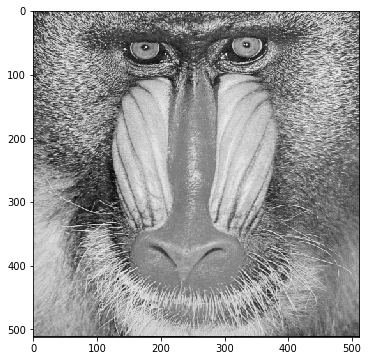

1


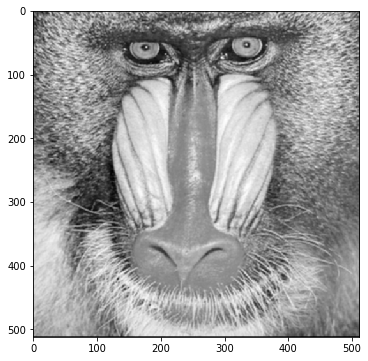

2


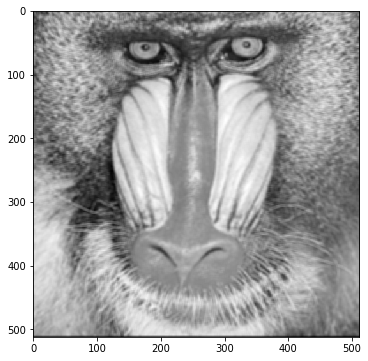

3


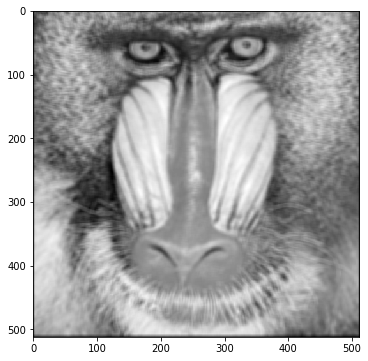

In [20]:
from scipy.signal import convolve2d
### your answer that below

imshow(mandrill_img)

k=np.zeros((3,3))
k=k+1
mf1=conv2d(mandrill_img,k)
imshow(mf1)


k=np.zeros((5,5))
k=k+1
mf2=conv2d(mandrill_img,k)
imshow(mf2)


k=np.zeros((7,7))
k=k+1
mf3=conv2d(mandrill_img,k)
imshow(mf3)


5. Display the transfert function of these mean filters. For a better visualization, use the zero-padding technique to obtain a filter with a large size (for instance $256\times 256$). Use `imshow()` and `toVisualizeLogFT()`.

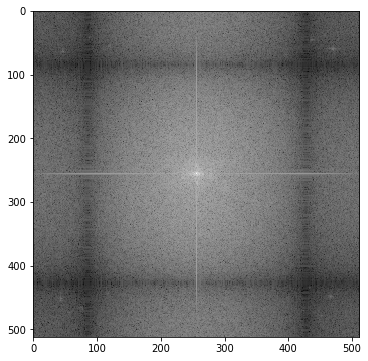

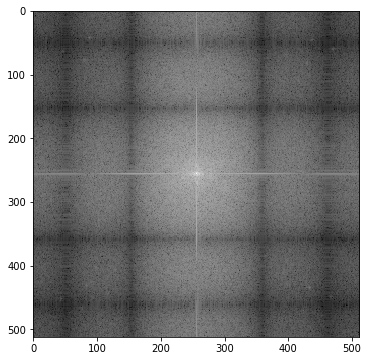

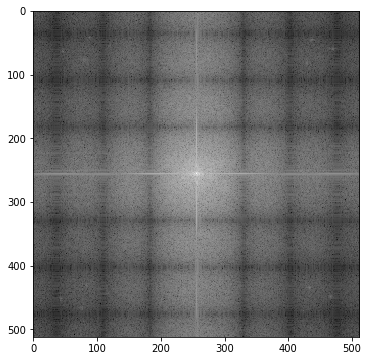

In [22]:
mandrill_ft1 = toVisualizeLogFT(computeFT(mf1))
imshow(mandrill_ft1)

mandrill_ft2 = toVisualizeLogFT(computeFT(mf2))
imshow(mandrill_ft2)

mandrill_ft3 = toVisualizeLogFT(computeFT(mf3))
imshow(mandrill_ft3)

6. Interpretation: what the analytic expression of the transfert function of a mean filter. Is  it an ideal low pass filter?

C'est un sinus cardinal 2d (produit cartésien de deux sinus cardinaux). Non le filtre n'est pas idéal, car à support fréquentiel non borné.

7. Bonus question: perform the same study for the Gaussian kernel. Determine sigma in order to have filter of size $3\times3$, $5\times5$, and $7\times7$.

In [23]:
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n = 2*np.ceil(3*sigma) + 1
    x,y = np.meshgrid(np.arange(-n//2,n//2),np.arange(-n//2,n//2))
    return  np.exp( (-x**2-y**2)/(2*sigma*sigma))
### your answer start below


## Exercice 3: anti aliasing filtering

1. Give a code that subsamples of factor 2 (use function `subSample2()` given in TME3) the image `img/barbara.png`.

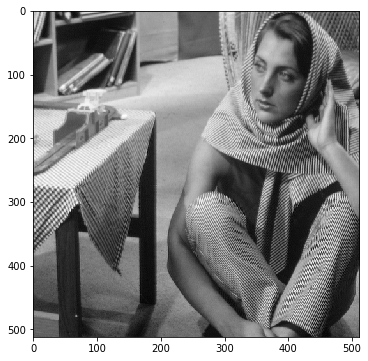

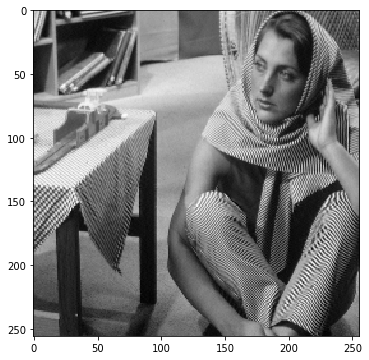

In [27]:
def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

barbara = np.array(Image.open('img/barbara.png'))
imshow(barbara)
barbara2 = subSample2(barbara)
imshow(barbara2)

2. Give a code that subsamples of factor 2 (use function `subSample2()`) the image `img/barbara.png` after applying an low pass filter (use `antiAliasingFilter()`). As comment, recall the principle of filtering in the frequency domain.

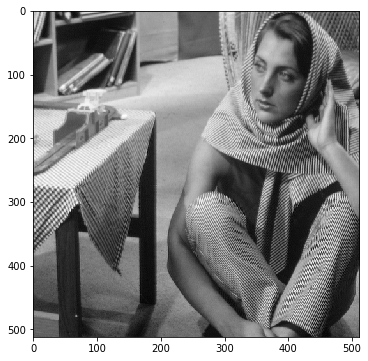

3


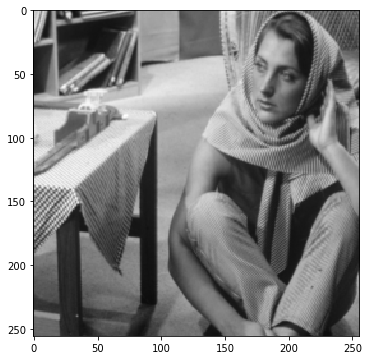

In [34]:
def antiAliasingFilter(n,m):
    """ int*int -> Array """
    n2, m2 = n//2, m//2
    rn, rm = n//4, m//4
    A = np.zeros((n, m))
    A[rn:rn+n2, rm:rm+m2] = 1
    return A
### your answer start below
imshow(barbara)
barbara3=subSample2(conv2d(barbara,antiAliasingFilter(7,7)))
imshow(barbara3)

3. Describe and analyze the filtering of Barbara with and without the anti aliasing filter. What information is lost for the two filtered images ?

## Exercice 4: color image
1. Read images `img/clown.bmp` and `img/clown_lumi.bmp` as two arrays named $I_1$ and $I_2$. Display these images examine their shape. What difference there are between them?

(512, 512, 3)


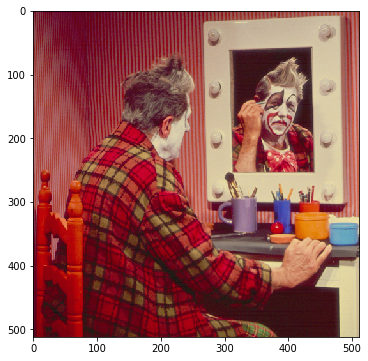

(512, 512)


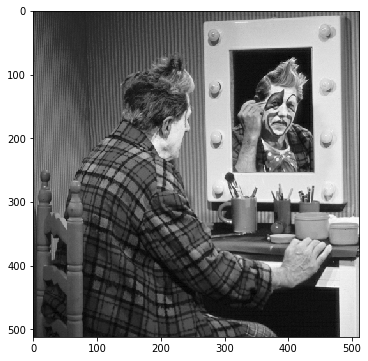

In [39]:
clown1 = np.array(Image.open('img/clown.bmp'))
clown2 = np.array(Image.open('img/clown_lumi.bmp'))
print(clown1.shape)
imshow(clown1)
print(clown2.shape)
imshow(clown2)

2. The first image is an array of dimension 3. Explain the signification of each dimension. From this image create 3 images $I_R$, $I_G$, $I_B$ of dimension 2. Display these three images and explain what you see.

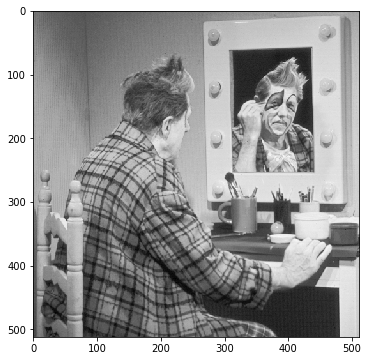

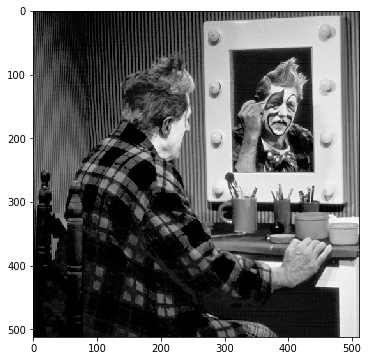

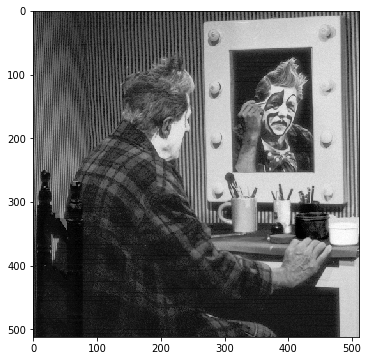

In [60]:
Ir=clown1[:,:,0]
Ig=clown1[:,:,1]
Ib=clown1[:,:,2]
imshow(Ir)
imshow(Ig)
imshow(Ib)

3. Create a new image $I_3$ of dimensions 3, the first dimension contains the value of $I_R$, the second the value of $I_B$ and the third the values of $I_G$. Try another combinations. Remark: color images are better handled by `imshow()` if pixel values range in $[0,1]$.

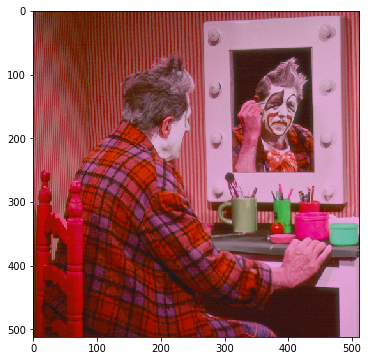

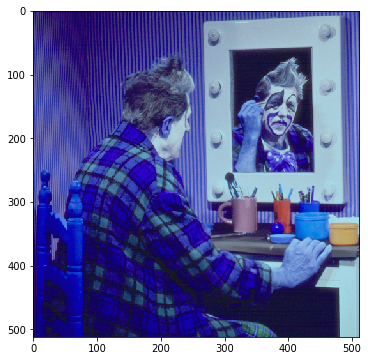

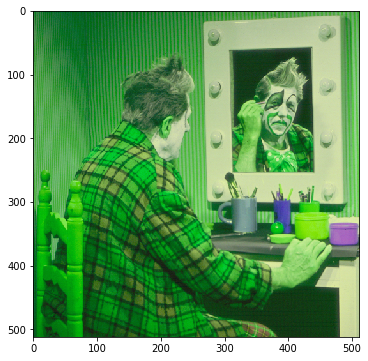

In [90]:
Ir2=np.expand_dims(Ir, axis=2)
Ig2=np.expand_dims(Ig, axis=2)
Ib2=np.expand_dims(Ib, axis=2)

I3=np.concatenate((np.concatenate((Ir2, Ib2), axis=2), Ig2), axis=2)/255
imshow(I3)

I3=np.concatenate((np.concatenate((Ib2, Ig2), axis=2), Ir2), axis=2)/255
imshow(I3)

I3=np.concatenate((np.concatenate((Ig2, Ir2), axis=2), Ib2), axis=2)/255
imshow(I3)

4. Write a code that allows the see the first channel with red colors, the second channel in green, and the blue channel in blue.

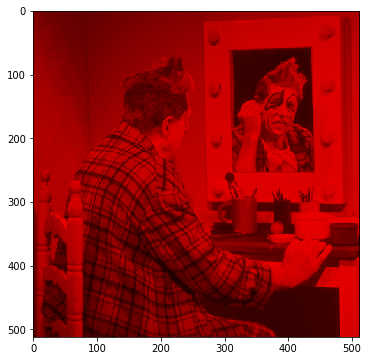

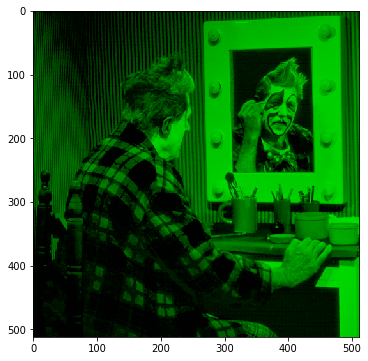

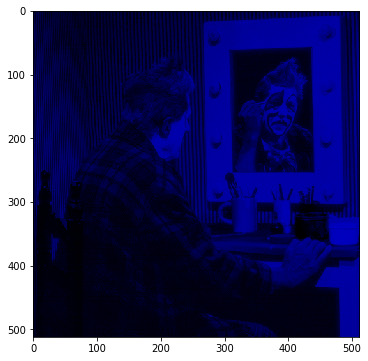

In [86]:
zeros_img=np.expand_dims(np.zeros((512, 512)), axis=2)
Ir_in_red=np.concatenate((np.concatenate((Ir2, zeros_img), axis=2), zeros_img), axis=2)/255
Ig_in_green=np.concatenate((np.concatenate((zeros_img, Ig2), axis=2), zeros_img), axis=2)/255
Ib_in_blue=np.concatenate((np.concatenate((zeros_img, zeros_img), axis=2), Ib2), axis=2)/255

imshow(Ir_in_red)
imshow(Ig_in_green)
imshow(Ib_in_blue)